In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
file="Sensorimotor_norms_29Jan2024.csv"
Lancaster_norms = pd.read_csv(file, sep=",")
Lancaster_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,Foot_leg.mean,Hand_arm.mean,Head.mean,...,Max_strength.sensorimotor,Exclusivity.sensorimotor,Dominant.sensorimotor,Minkowski3.perceptual,Minkowski3.action,Minkowski3.sensorimotor,N_known.perceptual,Percent_known.perceptual,N_known.action,Percent_known.action
0,A,2.214,0.000,0.429,0.000,0.000,2.429,0.000,0.357,1.071,...,2.429,0.354,Visual,2.934,1.097,2.984,14,0.737,14,0.667
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,0.381,0.429,2.714,...,4.333,0.285,Auditory,4.421,4.167,5.415,18,0.947,21,1.000
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,0.176,0.706,2.235,...,4.125,0.326,Visual,4.325,2.259,4.521,16,0.889,17,0.850
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,0.000,0.000,3.273,...,3.273,0.339,Head,3.007,3.274,3.964,17,0.850,11,0.579
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,0.000,2.474,2.632,...,3.944,0.263,Visual,4.887,3.219,5.314,18,0.947,19,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,1.263,1.474,2.632,...,3.800,0.289,Visual,3.840,2.914,4.333,20,1.000,19,1.000
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,0.300,1.650,3.150,...,3.789,0.349,Visual,3.793,3.296,4.488,19,1.000,20,1.000
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,0.053,1.789,3.421,...,3.444,0.310,Visual,3.488,3.578,4.452,18,1.000,19,1.000
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,0.800,0.800,2.267,...,3.071,0.186,Visual,3.955,2.392,4.227,14,0.778,15,0.750


In [49]:
#selecting columns
column=["Word","Auditory.mean","Gustatory.mean","Haptic.mean","Interoceptive.mean","Olfactory.mean","Visual.mean"]
sensory_dimentions_norms=pd.DataFrame(Lancaster_norms,columns=column)
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
0,A,2.214,0.000,0.429,0.000,0.000,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944
...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071


In [50]:
#sorting
visual_sorted=sensory_dimentions_norms.sort_values(by= ["Visual.mean"],ascending=False)
visual_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
30856,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000
3976,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000
2394,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000
30096,SEE,0.056,0.000,0.000,0.333,0.000,5.000
26376,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000
...,...,...,...,...,...,...,...
1611,AROMA,0.158,0.474,0.000,0.421,4.895,0.053
21939,MONOXIDE,0.235,0.000,0.000,1.471,0.941,0.000
34959,TONELESSLY,3.611,0.000,0.000,0.222,0.000,0.000
1952,AUDIBILITY,4.125,0.000,0.062,0.312,0.000,0.000


In [51]:
#sorting
haptic_sorted = sensory_dimentions_norms.sort_values(by = ["Haptic.mean"],ascending=False)
haptic_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
15458,HANDSHAKE,0.000,0.00,4.944,0.444,0.0,3.667
26413,PRICKLY,0.133,0.20,4.933,1.867,0.2,3.267
25345,PILLOW,0.529,0.00,4.882,1.529,1.0,4.706
35066,TOUCH,0.562,0.00,4.875,1.312,0.0,2.625
35072,TOUCHING,0.200,0.05,4.850,1.950,0.0,1.700
...,...,...,...,...,...,...,...
16466,HOUSEMASTER,1.357,0.00,0.000,0.286,0.0,2.929
6741,CONSCIENCE,0.579,0.00,0.000,3.684,0.0,0.158
6738,CONQUEROR,1.833,0.00,0.000,0.278,0.0,2.389
35701,TWEET,2.722,0.00,0.000,0.278,0.0,3.722


https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-where-method-and-masking 
- df.where is not asking where in a location sense but in a "take the data *where* it falls under a specific parameter"


In [58]:
sensory_dimentions_norms['visual.mask']= sensory_dimentions_norms['Visual.mean'][(sensory_dimentions_norms['Visual.mean']<= 3)& (sensory_dimentions_norms['Visual.mean']>=2)] 
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429,0.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN,0.222
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN,1.625
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824,0.294
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN,3.722
...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN,0.400
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN,0.316
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN,1.111
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN,0.857


In [59]:
sensory_dimentions_norms['haptic.mask']= sensory_dimentions_norms['Haptic.mean'][(sensory_dimentions_norms['Haptic.mean']<= 3)& (sensory_dimentions_norms['Haptic.mean']>=2)] 
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429,NaN
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824,NaN
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN,NaN


get rid of nan, how do we reduce this, ramdomized 

In [81]:
sensory_dimentions_norms=sensory_dimentions_norms.dropna()

In [82]:
np.random.seed(8)
# fixes the starting point of randomization
# 8 becuase its my favorite number!

In [83]:
sensory_dimentions_norms_sample = sensory_dimentions_norms.sample(n=300)
sensory_dimentions_norms_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
13240,FLUNG,0.800,0.000,2.400,0.450,0.000,2.900,2.900,2.400
28829,REWEAVE,0.133,0.000,2.067,0.067,0.067,2.600,2.600,2.067
36954,UNLOOSE,0.444,0.000,2.000,1.000,0.000,2.611,2.611,2.000
19318,KNOCKER,2.944,0.000,2.056,0.278,0.000,2.667,2.667,2.056
16681,HYMEN,0.176,0.000,2.294,1.471,0.000,2.412,2.412,2.294
...,...,...,...,...,...,...,...,...,...
19448,LANCES,0.375,0.000,2.062,0.875,0.062,3.000,3.000,2.062
3933,BREEZY,2.632,0.105,2.947,1.368,0.632,2.316,2.316,2.947
15788,HEAT PUMP,1.100,0.000,2.600,0.400,0.150,2.950,2.950,2.600
10655,EARPLUG,1.520,0.000,2.880,0.440,0.040,2.600,2.600,2.880


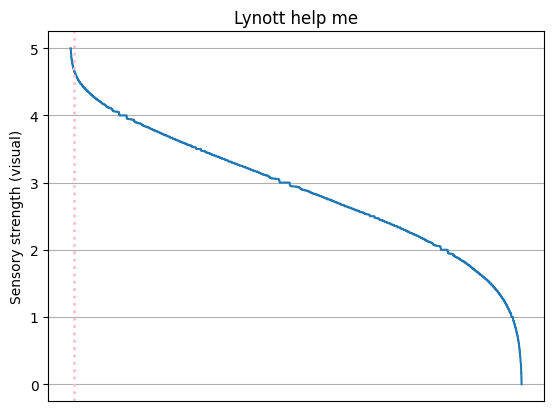

In [7]:
x_data = visual_sorted["Word"]
y_data = visual_sorted["Visual.mean"]
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

ax.set(xlabel = 'Words', ylabel='Sensory strength (visual)',
       title = 'Lynott help me')
ax.get_xaxis().set_visible(False)
ax.grid()

# add verticle line
ax.axvline(x = 300, color = 'pink', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()

****
Work to do

- add verticle line to over x axis after 300 words (visual and haptic)
- make haptic plot for the 300 words in the dataframe
- merge and filter for unquie occurance of words betweeen both list
- 

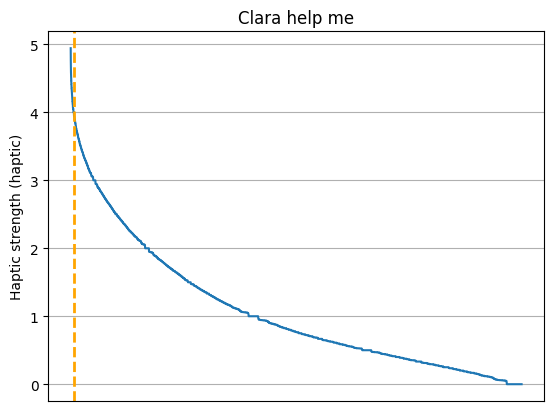

In [8]:
x_data = haptic_sorted["Word"]
y_data = haptic_sorted["Haptic.mean"]
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

ax.set(xlabel = 'Words', ylabel='Haptic strength (haptic)',
       title = 'Clara help me')
ax.get_xaxis().set_visible(False)
ax.grid()

# add verticle line
ax.axvline(x = 300, color = 'orange', linestyle = 'dashed', linewidth = 2)

#fig.savefig("test.png")
plt.show()

**
next to do
- subset words (pandas dataframe)

In [10]:
visual_subset = visual_sorted.iloc[:300]
haptic_subset = haptic_sorted.iloc[:300]

In [11]:
visual_subset_df = pd.DataFrame(visual_subset)
visual_subset_df['mixed'] = 'visual'


haptic_subset_df = pd.DataFrame(haptic_subset)
haptic_subset_df['mixed'] = 'haptic'

haptic_subset_df

#haptic_subset['vishpt'] = 'haptic'

combined_visual_haptic_df = pd.concat([visual_subset_df, haptic_subset_df], ignore_index=True)
combined_visual_haptic_df

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
595,GRASP,1.158,0.000,3.947,1.421,0.000,2.368,haptic
596,SEATBELT,1.000,0.053,3.947,0.421,0.105,3.579,haptic
597,GENITALIA,0.842,1.421,3.947,2.158,1.737,4.158,haptic
598,PUSHING,0.526,0.158,3.947,1.789,0.158,3.474,haptic


In [12]:
unique_df = combined_visual_haptic_df.drop_duplicates(subset=['Word'])
unique_df

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
595,GRASP,1.158,0.000,3.947,1.421,0.000,2.368,haptic
596,SEATBELT,1.000,0.053,3.947,0.421,0.105,3.579,haptic
597,GENITALIA,0.842,1.421,3.947,2.158,1.737,4.158,haptic
598,PUSHING,0.526,0.158,3.947,1.789,0.158,3.474,haptic


****

- slpit by value in a colum 
- box plot from column dataframe (5 plots) total 10 plot, 5 visual, 5 haptic


In [18]:
# split the columns 
# def split_name(mixed):
#   parts = name.split('haptic')
#  return parts[0], parts[1][0] + '.'

In [21]:
# maybe start by setting the index to TRUE/FALSE if 'mixed' = 'visual'
# assign new column for if mixed = 'haptic'


In [ ]:
# Apply the function to the "Name" column and create new columns
# combined_visual_haptic_df[['First Name', 'Last Initial']] = df['Name'].apply(split_name)


# Split the "full_name" column using space as the separator and create new columns
# df[['first_name', 'last_name']] = df['full_name'].str.split(' ', expand = True)

****
try again
we want to make a new uniue column with high visual and haptic values
the dataset is already in most to least visual
we have to take the these value and compare them to the least to most haptic
set a trheshold for both haptic and visual and create a new column with this to make it the visual-haptic column


    gemini code 
-  Find rows where the "category" column contains the hyphen
 split_index = df['category'].str.contains('-')

- Split the DataFrame based on the index
df_split1 = df[~split_index]  # Keep rows without the hyphen
df_split2 = df[split_index]    # Keep rows with the hyphen
- Extract the split value and remaining string using list comprehension
df_split2['category1'] = [x.split('-')[0] for x in df_split2['category']]
df_split2['category2'] = [x.split('-')[1] for x in df_split2['category']]

Print the split DataFrames
print(df_split1)
print(df_split2)


In [32]:
# my code 

# Find rows where the "category" column contains the hyphen
unique_split_index = unique_df['mixed'].str.contains(',')

# Split the DataFrame based on the index
#index = position
#this is useful becuase they mixed column is in order of least to most visual....
# hmm...

unique_split_1 = unique_df[~unique_split_index]  # Keep rows without the hyphen
unique_split_2 = unique_df[unique_split_index]    # Keep rows with the hyphen

# i do not understand but okay, i thought this was a csv, why am i using -

# everything works without the next 2 lines 

# Extract the split value and remaining string using list comprehension
 unique_split_2['mixed'] = [x.split(',')[0] for x in unique_split_index['visual']]
unique_split_2['mixed'] = [x.split(',')[1] for x in unique_split_index['haptic']]

search: how to mask data pandas within range
answeres : df.where
pandas, mask 

*** next steps

- plot visual , box plot, matplot (of each mean , all 5)
- plot haptic , box plot, matplot (of each mean , all 5)
- plot visual-haptic , box plot, matplot (of each mean , all 5)
- try to join/merge them all other, stack
- select column that we want (words, haptic, visual)
- identify them, tag them, join/merge them
- try to export dataframe as csv 
  
